In [32]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
n_task_per_file = 50
n_files = 10
base_dir = "proportional/toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [34]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [35]:
new_order = ['Naive', 1.0, 2.5, 5.0, 10.0, 'Tree val']
coverage_df = coverage_df[new_order]
coverage_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,0.714286,1.000000,1.000000,0.666667,0.333333,0.714286
1,0.500000,0.666667,0.666667,0.666667,0.500000,0.833333
2,0.666667,0.333333,0.666667,0.666667,0.571429,1.000000
3,0.666667,0.166667,0.666667,0.833333,0.833333,1.000000
4,0.500000,0.166667,0.500000,0.500000,0.000000,0.833333
...,...,...,...,...,...,...
5,0.600000,0.600000,0.714286,0.500000,0.833333,0.800000
6,0.500000,1.000000,0.500000,1.000000,0.000000,0.833333
7,0.666667,0.833333,0.857143,0.600000,0.800000,1.000000
8,0.833333,0.500000,0.666667,0.714286,0.666667,1.000000


In [36]:
length_df = length_df[new_order]
length_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,1.258967,3.919505,2.175160,1.597825,1.386943,25.308622
1,1.166525,4.108382,2.401613,2.049737,3.444130,2.290091
2,1.178633,4.904650,23.868815,2.223698,1.681197,1.871536
3,1.175594,5.127870,2.520628,1.597803,1.395036,8.596456
4,1.148400,4.959092,2.437926,2.500935,1.366425,4.511139
...,...,...,...,...,...,...
5,1.078051,5.875155,2.382748,2.588310,1.688770,3.577536
6,1.163800,4.836759,2.494531,1.720444,1.436350,5.555030
7,1.177374,4.623037,2.574455,1.666010,1.434055,8.988371
8,1.176184,4.073163,2.237043,3.509050,1.483775,4.066109


In [37]:
MSE_df = MSE_df[new_order]
MSE_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,4.774639,4.754626,5.385438,6.062667,5.715567,4.774639
1,4.747049,5.007723,4.517161,5.284633,5.598432,4.747049
2,4.853868,5.004523,4.477550,4.936360,5.975434,4.853868
3,5.547141,6.023852,5.498041,6.179695,6.447653,5.547141
4,4.162055,3.863381,4.093041,4.473121,4.453665,4.162055
...,...,...,...,...,...,...
5,4.586428,4.553842,4.495020,4.952558,5.074421,4.586428
6,5.021880,4.145969,5.010394,4.833619,5.233266,5.021880
7,5.405354,5.001922,5.856879,5.448736,6.714539,5.405354
8,3.674114,3.822942,3.930528,4.394050,5.004894,3.674114


In [38]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        new_label = [x if x != "Naive" else r"Naïve" for x in col_names]
        axes[i].set_xticklabels(new_label)
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10,)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,7)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=1)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_35112/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_35112/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_35112/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)


Coverage :
 Naive          0.677645
RRT(1)         0.669552
RRT(2.5)       0.717757
RRT(5)         0.677528
RRT(10)        0.544452
Tree-values    0.913394
dtype: float64
Length :
 Naive          1.179111
RRT(1)         4.642270
RRT(2.5)       4.296546
RRT(5)         2.593073
RRT(10)        3.448357
Tree-values    8.207369
dtype: float64
MSE :
 Naive          4.704900
RRT(1)         4.704495
RRT(2.5)       4.880229
RRT(5)         5.149999
RRT(10)        5.401152
Tree-values    4.704900
dtype: float64


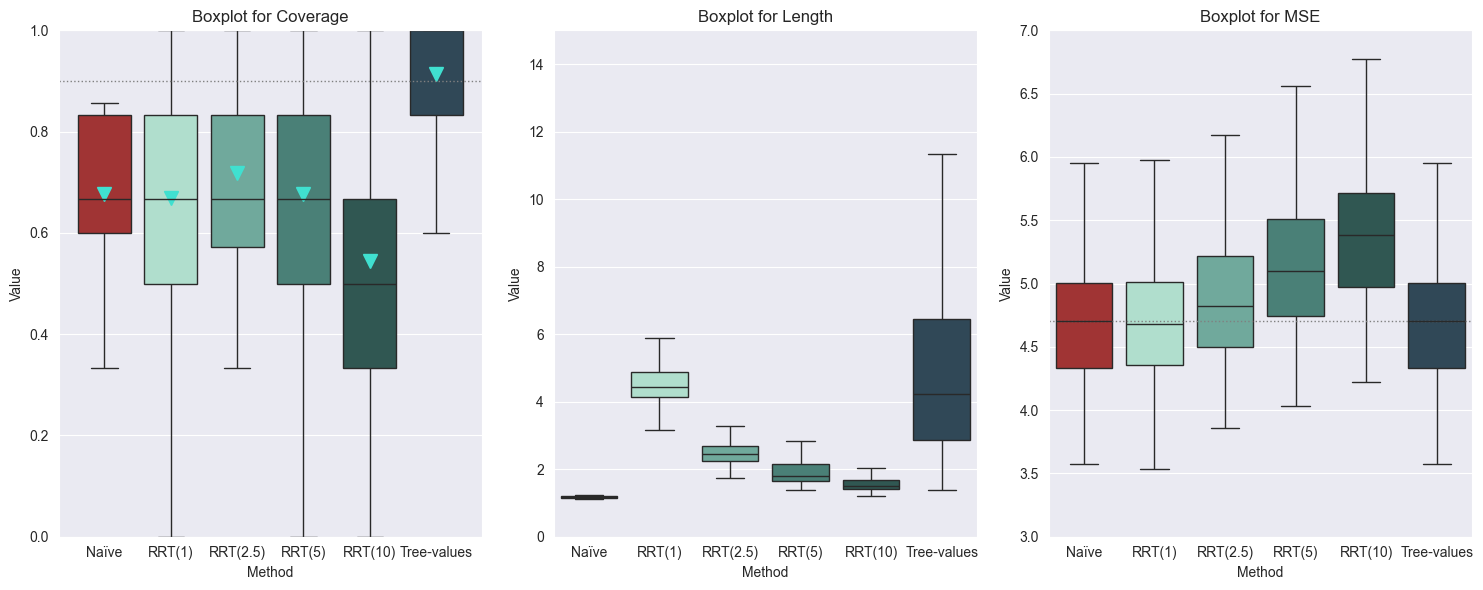

In [39]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=15,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D"])